In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.stats import friedmanchisquare

In [5]:
# I need to perform friedman test on all three coumns in the avg_task_completion_time.csv 
# file. I will use the friedmanchisquare function from the scipy.stats library to perform
# the test. This function will return the test statistic and the p-value. I will then
# compare the p-value to the significance level to determine if the null hypothesis can
# be rejected.'
# Load the data
data = pd.read_csv('gross_error_rate.csv')

# Perform the friedman test
stat = friedmanchisquare(data['Eye_Gaze_Hands'], data['Neuro_Gaze'], data['VR_Controllers'])

print(stat)

FriedmanchisquareResult(statistic=7.605263157894761, pvalue=0.022311978797129976)


C:\Users\ATI\AppData\Local\Temp\ipykernel_46412\3843322834.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Technique Label', y='Error Count', data=data_long, order=order, errorbar=('ci', 95), palette=palette)


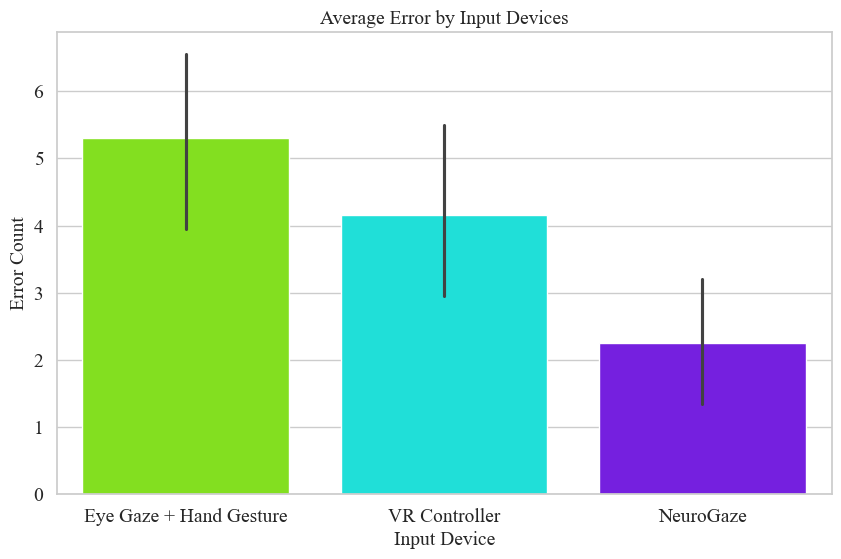

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

# Assuming 'data' is your DataFrame loaded from the CSV

# Transform the DataFrame from wide format to long format
data_long = pd.melt(data, var_name='Technique', value_name='Error Count')

# Map the original 'Technique' column to the new desired labels with correct ordering
technique_mapping = {
    'Eye_Gaze_Hands': 'Eye Gaze + Hand Gesture',
    'VR_Controllers': 'VR Controller',
    'Neuro_Gaze': 'NeuroGaze'
}
data_long['Technique Label'] = data_long['Technique'].map(technique_mapping)

# Ensure the order matches your requirement
order = ['Eye Gaze + Hand Gesture', 'VR Controller', 'NeuroGaze']

# Set the font properties for Times New Roman
font = FontProperties()
font.set_family('Times New Roman')
font.set_size('14')  # Adjust the base size as needed

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom color palette with your specific colors
palette = ['#5975a4', '#cc8963', '#5f9e6e']

# Create the bar plot with specified order, error bars, and the custom palette
ax = sns.barplot(x='Technique Label', y='Error Count', data=data_long, order=order, errorbar=('ci', 95), palette=palette)

# Add labels and title with explicit font settings
ax.set_xlabel('Input Device', fontproperties=font)
ax.set_ylabel('Error Count', fontproperties=font)
ax.set_title('Average Error by Input Devices', fontproperties=font)

# Set the properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font)

# Show the plot
plt.show()
